# 1. Introduction

## 1.1 Profile

Nama        : Joshua Abigail <br>
Batch       : HCK-019 <br>
Objective   : Membuat model klasifikasi untuk memprediksi Gradeclass murid dan mencari tau faktor - faktor apa saja yang mempengaruhi Gradeclass. Akan dibuat beberapa model sebagai perbandingan.

---

## 1.2 Latar Belakang

Performa akademik siswa merupakan salah satu indikator penting dalam
dunia pendidikan. Banyak faktor yang mempengaruhi performa ini, seperti
demografis, kebiasaan belajar, dukungan orang tua, dan kegiatan ekstrakurikuler.
Pemahaman yang mendalam tentang bagaimana faktor-faktor ini saling
berinteraksi dan mempengaruhi hasil akademik dapat membantu sekolah, guru,
dan orang tua dalam merancang strategi yang lebih efektif untuk meningkatkan
hasil belajar siswa. Dengan demikian, analisis terhadap dataset ini dapat
memberikan wawasan mengenai faktor-faktor yang paling signifikan dalam
menentukan kesuksesan akademik siswa.

## 1.3 Smart

Specific: Mengetahui seberapa berpengaruh faktor-faktor yang mempengaruhi nilai akademik siswa. <br><br>
Measurable: Menaikkan nilai rata – rata GPA siswa minimal menjadi 3 (Grade B).<br><br>
(Achievable): Membangun model menggunakan teknik klasifikasi standar seperti Decision Tree, Random Forest, atau Support 
Vector Machine (SVM), dengan data yang tersedia.<br><br>
Relevan (Relevant): Menyediakan informasi yang dapat digunakan oleh sekolah, guru, dan orang tua sehingga dapat menerapkan strategi lebih lanjut untuk meningkatkan performa akademik siswa.<br><br>
Berbatas Waktu (Time-bound): Menyelesaikan analisis dan melaporkan 
temuan dalam kurun waktu yang ditentukan 3 bulan.


## 1.4 Perumusan Masalah

1. Apakah ada hubungan antara jumlah absensi (Absences) dengan klasifikasi nilai akademik siswa (GradeClass)?<br><br>
2. Bagaimana pengaruh waktu belajar mingguan (StudyTimeWeekly) terhadap klasifikasi nilai akademik siswa (GradeClass)?<br><br>
3. Apakah keterlibatan orang tua (ParentalSupport) berpengaruh signifikan terhadap klasifikasi nilai akademik siswa?<br><br>
4. Bagaimana partisipasi dalam kegiatan ekstrakurikuler (Extracurricular), olahraga (Sports) dan musik (Music), mempengaruhi klasifikasi nilai akademik siswa?<br><br>
5. Apakah terdapat perbedaan signifikan dalam klasifikasi nilai akademik siswa berdasarkan jenis kelamin (Gender) dan latar belakang etnis (Ethnicity)?<br><br>

# 2. Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation & Statistic
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# Feature Engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import xgboost as xgb
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline as ImbPipeline

# Model Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

# Model Saving
import pickle
import json

# 3. Data Loading

## 3.1 Dataset Details

- Source : (https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data) <br>
- Description : Berikut adalah dataset mengenai student performance

| No | columns | data type | details|
|----|----|-----|-----|
| 1 | Age | int| The age of the students ranges from 15 to 18 years.|
| 2 | Gender | int | Gender of the students (0 = Male, 1 = Female).|
| 3 | Ethnicity | int | The ethnicity of the students (0: Caucasian, 1: African American, 2: Asian, 3: Other).|
| 4 | ParentalEducation | int | The education level of the parents (0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher)|
| 5 | StudyTimeWeekly | float | Weekly study time in hours, ranging from 0 to 20.|
| 6 | Absences | object | Number of absences during the school year, ranging from 0 to 30.|
| 7 | Tutoring | object | Tutoring status (0 = No, 1 = Yes)|
| 8 | ParentalSupport | object | The level of parental support (0: None, 1: Low, 2: Moderate, 3: High, 4: Very High)|
| 9 | Extracurricular | object | Participation in extracurricular activities (0 = No, 1 = Yes).|
| 10 | Sports | object | Participation in sports (0 = No, 1 = Yes)|
| 11 | Music | object | Participation in music activities, where 0 indicates No and 1 indicates Yes.|
| 12 | Volunteering | object | Participation in volunteering (0 = No, 1 = Yes).|
| 13 | GPA | object | Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.|
| 14 | GradeClass | object | 0 = A (GPA >= 3.5), 1 = B (3.0 <= GPA < 3.5), 2 = C (2.5 <= GPA < 3.0), 3 = D (2.0 <= GPA < 2.5), 4 = E (GPA < 2.0) |














## 3.2 Dataset Preview

In [2]:
# load dataset
df = pd.read_csv("Student_performance_data _.csv")
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


# 4. Exploratory Data Analysis (EDA)

## 4.1 Apakah ada hubungan antara jumlah absensi (Absences) dengan klasifikasi nilai akademik siswa (GradeClass)?


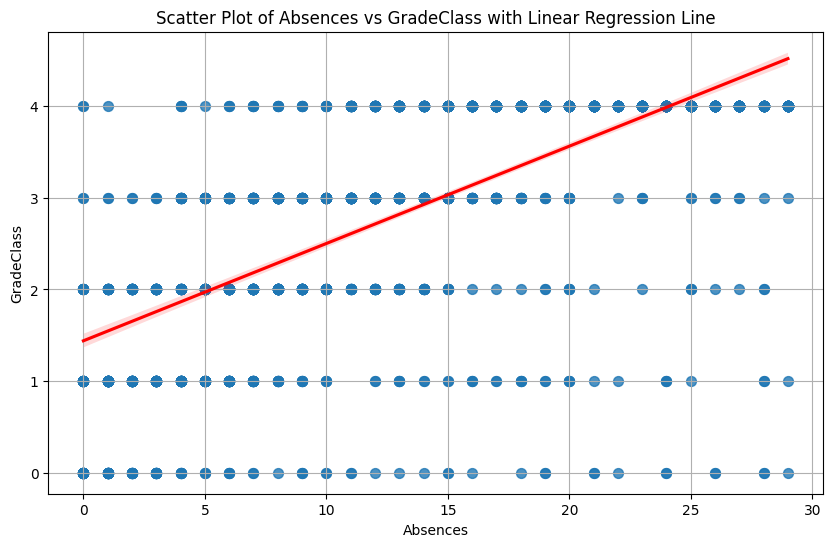

In [3]:
# Scatter plot between Absences and GradeClass
plt.figure(figsize=(10, 6))
sns.regplot(x='Absences', y='GradeClass', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Scatter Plot of Absences vs GradeClass with Linear Regression Line')
plt.xlabel('Absences')
plt.ylabel('GradeClass')
plt.grid(True)
plt.show()

In [4]:
corr_tau, pval_k = stats.kendalltau(df['Absences'], df['GradeClass'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: 0.64, p-value: 0.0


- Digunakan korelasi kendall-tau karena kolom absences adalah numerical dan kolom Grade class adalah ordinal kategorical, sehingga kendall-tau cocok untuk uji korelasi ini.

- Dilihat dari visualisasi scatter plot, dapat dilihat bahwa terdapat hubungan yang signifikan dan positif antara jumlah absensi dengan Gradeclass. Semakin banyak absensi yang dicatat, semakin tinggi kecenderungan siswa mendapatkan Gradeclass yang lebih tinggi. Korelasi ini sangat kuat dan signifikan berdasarkan nilai tau dan p-value, yang menunjukkan bahwa hubungan tersebut tidak terjadi secara kebetulan.

- Perlu diingat bahwa semakin tinggi Gradeclass, semakin rendah pula nilai GPA nya

## 4.2 Bagaimana pengaruh waktu belajar mingguan (StudyTimeWeekly) terhadap klasifikasi nilai akademik siswa (GradeClass)?

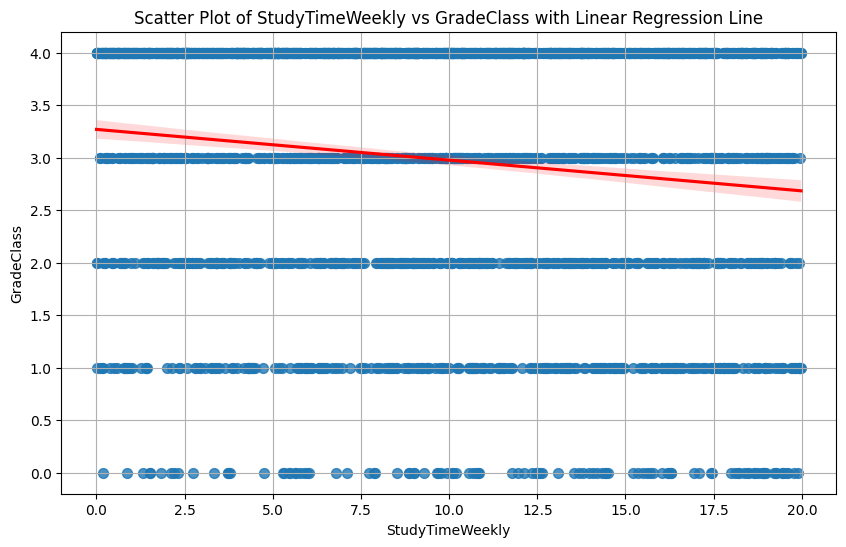

In [5]:
# Scatter plot between StudyTimeWeekly and GradeClass
plt.figure(figsize=(10, 6))
sns.regplot(x='StudyTimeWeekly', y='GradeClass', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Scatter Plot of StudyTimeWeekly vs GradeClass with Linear Regression Line')
plt.xlabel('StudyTimeWeekly')
plt.ylabel('GradeClass')
plt.grid(True)
plt.show()

In [6]:
corr_tau, pval_k = stats.kendalltau(df['StudyTimeWeekly'], df['GradeClass'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: -0.10, p-value: 3.535194891063458e-10


- Digunakan korelasi kendall-tau karena kolom StudyTimeWeekly adalah numerical dan kolom Grade class adalah ordinal kategorical, sehingga kendall-tau cocok untuk uji korelasi ini.

- Garis regresi linier yang cenderung menurun menunjukkan adanya sedikit hubungan negatif antara StudyTimeWeekly dan Grade Class. terlihat bahwa siswa dengan waktu belajar yang berbeda-beda tersebar merata di berbagai GradeClass. Tidak ada pola yang sangat kuat atau jelas dalam distribusi.

- Terdapat korelasi negatif yang sangat lemah antara StudyTimeWeekly dan GradeClass, dengan arah hubungan menunjukkan bahwa semakin banyak waktu belajar per minggu, GradeClass akan cenderung sedikit lebih rendah. Meskipun demikian, hubungan ini signifikan secara statistik berdasarkan nilai p-value yang sangat kecil. Namun, secara praktis, efek dari waktu belajar terhadap nilai kelas tidak terlalu kuat.

- Perlu diingat bahwa semakin tinggi Gradeclass, semakin rendah pula nilai GPA nya

## 4.3 Apakah keterlibatan orang tua (ParentalSupport) berpengaruh signifikan terhadap klasifikasi nilai akademik siswa?

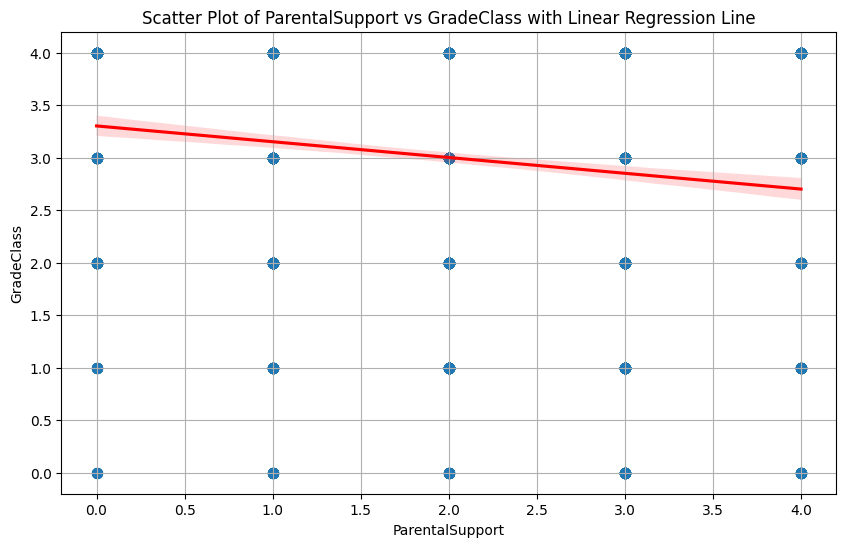

In [7]:
# Scatter plot between ParentalSupport and GradeClass
plt.figure(figsize=(10, 6))
sns.regplot(x='ParentalSupport', y='GradeClass', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Scatter Plot of ParentalSupport vs GradeClass with Linear Regression Line')
plt.xlabel('ParentalSupport')
plt.ylabel('GradeClass')
plt.grid(True)
plt.show()

In [8]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['ParentalSupport'], df['GradeClass'])

# Melakukan tes Chi-Square
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Menentukan level signifikansi
alpha = 0.05

# Mencetak hasil tes
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Menyusun dan mencetak keputusan hipotesis
if p_value < alpha:
    print("Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `ParentalSupport` dan `GradeClass`.")
    print("Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `ParentalSupport` dan `GradeClass`.")
    print("Keputusan: Menolak hipotesis nol. Ada hubungan signifikan antara `ParentalSupport` dan `GradeClass`.")
else:
    print("Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `ParentalSupport` dan `GradeClass`.")
    print("Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `ParentalSupport` dan `GradeClass`.")
    print("Keputusan: Gagal menolak hipotesis nol. Tidak ada hubungan signifikan antara `ParentalSupport` dan `GradeClass`.")

Chi-Square Statistic: 73.78266419541622
P-value: 2.1506704168219007e-09
Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `ParentalSupport` dan `GradeClass`.
Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `ParentalSupport` dan `GradeClass`.
Keputusan: Menolak hipotesis nol. Ada hubungan signifikan antara `ParentalSupport` dan `GradeClass`.


- Digunakan uji korelasi chi-square untuk mengukur nilai korelasi antar 2 kolom kategorical.

- Garis regresi linier yang sedikit menurun menunjukkan adanya hubungan negatif antara dukungan orang tua dan GradeClass, namun hubungan ini sangat lemah.

- Sebaran data memperlihatkan bahwa siswa dengan berbagai tingkat dukungan orang tua tersebar di seluruh GradeClass dan tidak ada pola yang jelas atau sangat kuat di antara variabel-variabel tersebut.

- Dengan nilai p-value > 0.05, dapat diambil kesimpulan bahwa terdapat hubungan yang signifikan antara ParentalSupport dan GradeClass. Ini berarti tingkat dukungan orang tua berhubungan dengan kelas nilai siswa, meskipun dari korelasi sebelumnya diketahui bahwa hubungan ini lemah. Namun secara statistik, korelasi ini nyata. H0 ditolak dan H1 diterima

## 4.4 Bagaimana partisipasi dalam kegiatan ekstrakurikuler (Extracurricular), olahraga (Sports) dan musik (Music), mempengaruhi klasifikasi nilai akademik siswa?


<Figure size 1200x1000 with 0 Axes>

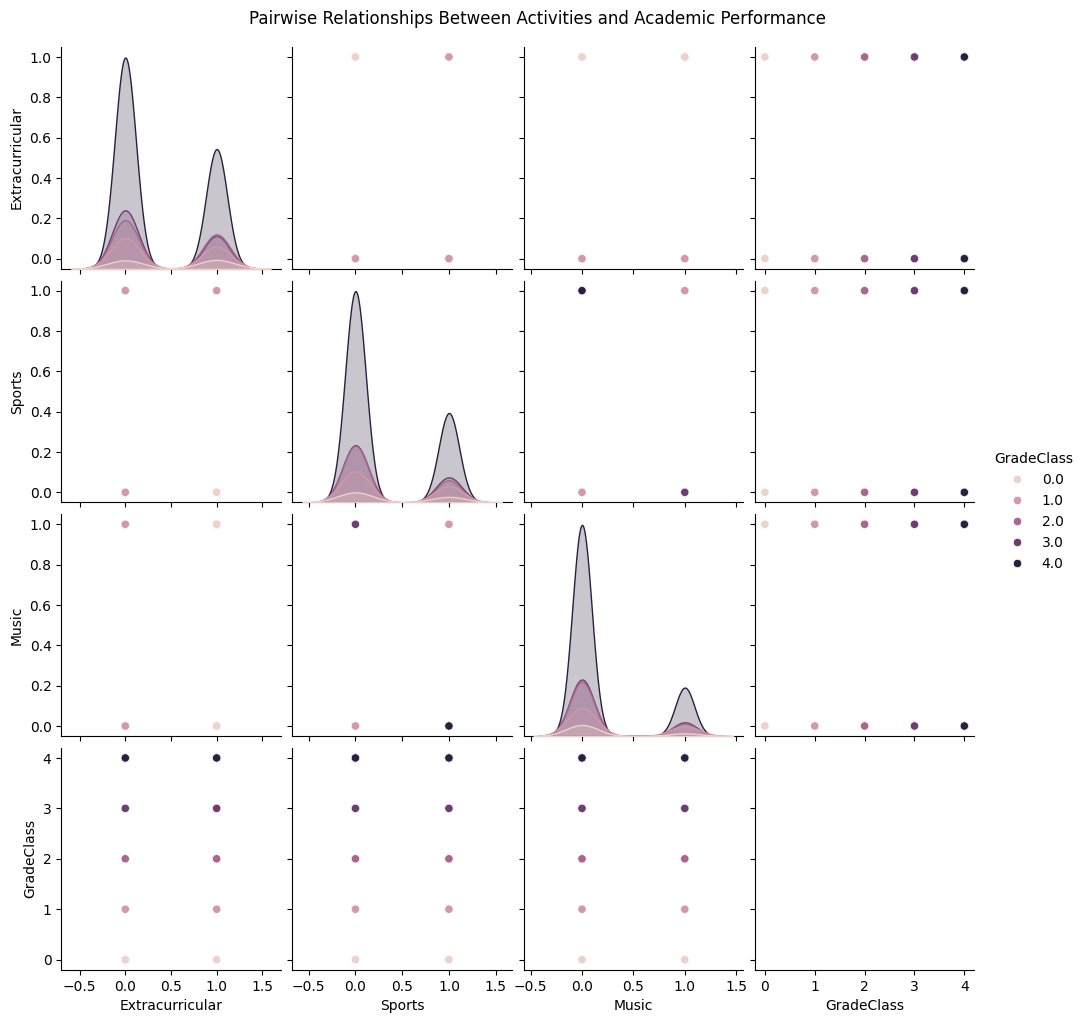

In [1621]:
# Menggunakan pairplot untuk melihat hubungan antara partisipasi dan nilai akademik
plt.figure(figsize=(12, 10))
sns.pairplot(df, vars=['Extracurricular', 'Sports', 'Music', 'GradeClass'], hue='GradeClass')
plt.suptitle('Pairwise Relationships Between Activities and Academic Performance', y=1.02)
plt.show()

In [9]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['Extracurricular'], df['GradeClass'])

# Melakukan tes Chi-Square
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Menentukan level signifikansi
alpha = 0.05

# Mencetak hasil tes
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Menyusun dan mencetak keputusan hipotesis
if p_value < alpha:
    print("Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `Extracurricular` dan `GradeClass`.")
    print("Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `Extracurricular` dan `GradeClass`.")
    print("Keputusan: Menolak hipotesis nol. Ada hubungan signifikan antara `Extracurricular` dan `GradeClass`.")
else:
    print("Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `Extracurricular` dan `GradeClass`.")
    print("Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `Extracurricular` dan `GradeClass`.")
    print("Keputusan: Gagal menolak hipotesis nol. Tidak ada hubungan signifikan antara `Extracurricular` dan `GradeClass`.")

Chi-Square Statistic: 14.217072478079006
P-value: 0.006633525439525449
Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `Extracurricular` dan `GradeClass`.
Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `Extracurricular` dan `GradeClass`.
Keputusan: Menolak hipotesis nol. Ada hubungan signifikan antara `Extracurricular` dan `GradeClass`.


In [1623]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['Sports'], df['GradeClass'])

# Melakukan tes Chi-Square
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Menentukan level signifikansi
alpha = 0.05

# Mencetak hasil tes
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Menyusun dan mencetak keputusan hipotesis
if p_value < alpha:
    print("Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `Sports` dan `GradeClass`.")
    print("Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `Sports` dan `GradeClass`.")
    print("Keputusan: Menolak hipotesis nol. Ada hubungan signifikan antara `Sports` dan `GradeClass`.")
else:
    print("Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `Sports` dan `GradeClass`.")
    print("Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `Sports` dan `GradeClass`.")
    print("Keputusan: Gagal menolak hipotesis nol. Tidak ada hubungan signifikan antara `Sports` dan `GradeClass`.")

Chi-Square Statistic: 4.369235709031912
P-value: 0.3583355089660035
Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `Sports` dan `GradeClass`.
Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `Sports` dan `GradeClass`.
Keputusan: Gagal menolak hipotesis nol. Tidak ada hubungan signifikan antara `Sports` dan `GradeClass`.


In [1624]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['Music'], df['GradeClass'])

# Melakukan tes Chi-Square
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Menentukan level signifikansi
alpha = 0.05

# Mencetak hasil tes
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Menyusun dan mencetak keputusan hipotesis
if p_value < alpha:
    print("Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `Music` dan `GradeClass`.")
    print("Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `Music` dan `GradeClass`.")
    print("Keputusan: Menolak hipotesis nol. Ada hubungan signifikan antara `Music` dan `GradeClass`.")
else:
    print("Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `Music` dan `GradeClass`.")
    print("Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `Music` dan `GradeClass`.")
    print("Keputusan: Gagal menolak hipotesis nol. Tidak ada hubungan signifikan antara `Music` dan `GradeClass`.")

Chi-Square Statistic: 7.891467870855215
P-value: 0.09563575126138266
Hipotesis Nol (H0): Tidak ada asosiasi atau hubungan antara `Music` dan `GradeClass`.
Hipotesis Alternatif (H1): Ada asosiasi atau hubungan antara `Music` dan `GradeClass`.
Keputusan: Gagal menolak hipotesis nol. Tidak ada hubungan signifikan antara `Music` dan `GradeClass`.


- Karena kolom ekstrakurikuler, Sport, Music, dan Grade Class adalah kolom kategorikal, maka digunakan uji korelasi chi-square untuk mengukur nilai korelasi antar 2 kolom kategorical. 

- Partisipasi murid dalam kegiatan ekstrakurikuler secara umum memiliki hubungan signifikan dengan Grade Class, sedangkan Sport dan Music tidak menunjukkan hubungan yang signifikan secara statistik terhadap Grade Class.

## 4.5 Apakah terdapat perbedaan signifikan dalam klasifikasi nilai akademik siswa berdasarkan jenis kelamin (Gender) dan latar belakang etnis (Ethnicity)?<br><br>

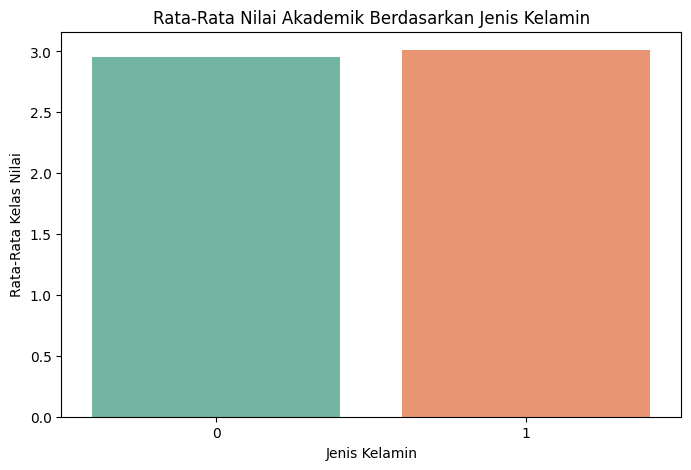

In [1625]:
# Menghitung rata-rata nilai akademik berdasarkan Gender
average_by_gender = df.groupby('Gender')['GradeClass'].mean().reset_index()

# Visualisasi Bar Plot berdasarkan Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='GradeClass', data=average_by_gender, palette='Set2')
plt.title('Rata-Rata Nilai Akademik Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-Rata Kelas Nilai')
plt.show()

In [1626]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['Gender'], df['GradeClass'])

# Melakukan tes Chi-Square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 1.9153728454653411
P-value: 0.7513204328843887


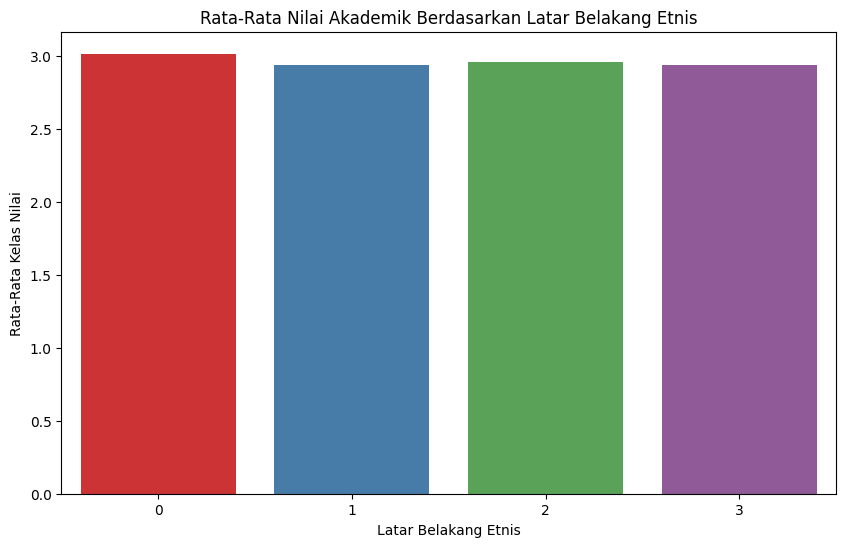

In [1627]:
# Menghitung rata-rata nilai akademik berdasarkan Ethnicity
average_by_ethnicity = df.groupby('Ethnicity')['GradeClass'].mean().reset_index()

# Visualisasi Bar Plot berdasarkan Ethnicity
plt.figure(figsize=(10, 6))
sns.barplot(x='Ethnicity', y='GradeClass', data=average_by_ethnicity, palette='Set1')
plt.title('Rata-Rata Nilai Akademik Berdasarkan Latar Belakang Etnis')
plt.xlabel('Latar Belakang Etnis')
plt.ylabel('Rata-Rata Kelas Nilai')
plt.show()

In [1628]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['Ethnicity'], df['GradeClass'])

# Melakukan tes Chi-Square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 7.918833433122388
P-value: 0.7914406773686918


- Karena kolom Gender, Ethnicity, dan Grade Class adalah kolom kategorical, maka digunakan uji korelasi chi-square untuk mengukur nilai korelasi antar 2 kolom kategorical. 

- Nilai rata-rata antara dua kelompok jenis kelamin terlihat sangat mirip, dengan perbedaan yang kecil. Ini menunjukkan bahwa rata-rata Grade Class untuk kedua jenis kelamin tersebut hampir sama.

- Berdasarkan uji Chi-Square dengan p-value yang lebih besar dari 0.05, berarti gagal menolak hipotesis nol. Ini berarti tidak ada hubungan signifikan antara jenis kelamin dan GradeClass.

- Rata-rata nilai Grade Class terlihat serupa di antara berbagai Ethnicity, hanya terdapat sedikit perbedaan di antara mereka. Ini menunjukkan bahwa tidak ada perbedaan mencolok dalam Grade Class berdasarkan Ethnicity.

- Dengan p-value yang jauh lebih besar dari 0.05, kita gagal menolak hipotesis nol. Ini menunjukkan bahwa tidak ada hubungan signifikan antara Ethnicity dan GradeClass.

# 5. Feature Engineering

In [1629]:
# duplicate data for feature engineering
dfc = df.copy()

In [1630]:
# untuk mengecek data duplikat
dfc.duplicated().sum()

0

In [1631]:
dfc.drop(columns=['GPA'], inplace=True)

## 5.1 Cardinality

In [1632]:
def cardinal_check (data : pd.DataFrame, cat_cols : list):
    car_name = []
    nuniques = []
    unique = []

    for columns in cat_cols:
        car_name.append(columns)
        nuniques.append(data[columns].nunique())
        list_unique = list(data[columns].unique())
        unique.append(list_unique)

    dfc = pd.DataFrame({
    "namaKolom" : car_name,
    "uniqueKolom" : nuniques,
    "nilaiUnique" : unique})

    return dfc

cardinal_check (dfc,['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass'])

,namaKolom,uniqueKolom,nilaiUnique
0,StudentID,2392,"[1001, 1002, 1003, 1004, 1005, 1006, 1007, 100..."
1,Age,4,"[17, 18, 15, 16]"
2,Gender,2,"[1, 0]"
3,Ethnicity,4,"[0, 2, 1, 3]"
4,ParentalEducation,5,"[2, 1, 3, 4, 0]"
5,StudyTimeWeekly,2392,"[19.833722807854716, 15.40875605584674, 4.2105..."
6,Absences,30,"[7, 0, 26, 14, 17, 10, 22, 1, 11, 15, 21, 9, 1..."
7,Tutoring,2,"[1, 0]"
8,ParentalSupport,5,"[2, 1, 3, 4, 0]"
9,Extracurricular,2,"[0, 1]"


In [1633]:
dfc['StudyTimeWeekly'] = dfc['StudyTimeWeekly'].round().astype(int)

In [1634]:
def cardinal_check (data : pd.DataFrame, cat_cols : list):
    car_name = []
    nuniques = []
    unique = []

    for columns in cat_cols:
        car_name.append(columns)
        nuniques.append(data[columns].nunique())
        list_unique = list(data[columns].unique())
        unique.append(list_unique)

    dfc = pd.DataFrame({
    "namaKolom" : car_name,
    "uniqueKolom" : nuniques,
    "nilaiUnique" : unique})

    return dfc

cardinal_check (dfc,['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass'])

,namaKolom,uniqueKolom,nilaiUnique
0,StudentID,2392,"[1001, 1002, 1003, 1004, 1005, 1006, 1007, 100..."
1,Age,4,"[17, 18, 15, 16]"
2,Gender,2,"[1, 0]"
3,Ethnicity,4,"[0, 2, 1, 3]"
4,ParentalEducation,5,"[2, 1, 3, 4, 0]"
5,StudyTimeWeekly,21,"[20, 15, 4, 10, 5, 8, 16, 18, 12, 11, 3, 19, 7..."
6,Absences,30,"[7, 0, 26, 14, 17, 10, 22, 1, 11, 15, 21, 9, 1..."
7,Tutoring,2,"[1, 0]"
8,ParentalSupport,5,"[2, 1, 3, 4, 0]"
9,Extracurricular,2,"[0, 1]"


- Tidak terdapat data duplikat pada dataset ini.
- Kolom 'GPA' dihapus karena 'GPA' dan 'Grade Class' pada dasarnya mewakili hal yang sama, keduanya merupakan ukuran kinerja akademis siswa dan merupakan target tersendiri. Jadi saya menghilangkan kolom 'GPA' karena ingin menggunakan 'Grade Class' sebagai target.
- Kolom 'StudentID' dan 'StudyTimeWeekly' memiliki banyak nilai unik, masing-masing 2392. Ini menunjukkan bahwa 'StudentID' adalah kolom identifier yang bersifat unik untuk setiap siswa.
- Terdapat 3 kolom numerical, yaitu 'StudyTimeWeekly', 'Absences', 'Age' dan sisanya adalah kolom kategorical yang sudah ter-encoding, total berjumlah 11 kolom.
- Kolom 'StudyTimeWeekly' memiliki cardinality yang besar dikarenakan variasi pada data dihitung dalam desimal, sehingga menyebabkan unique valuenya meningkat. Untuk mengatasi cardinality yang besar ini, saya memutuskan untuk membulatkan angka ke bilangan terdekat.


## 5.2 Splitting Train & Test

In [1635]:
# memisahkan kolom feature dengan target
X = dfc.drop(columns='GradeClass')
y = dfc['GradeClass']

In [1636]:
# splitting data untuk train dan test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [1637]:
# membagi kolom numeric dan kategorikal untuk 
list_num_cols = dfc[['StudyTimeWeekly', 'Absences', 'Age']]

list_cat_cols = dfc[['StudentID', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 
                    'Music', 'Volunteering', 'GradeClass']]

## 5.3 Handling Missing Value

In [1638]:
# Misalkan dfc adalah DataFrame yang sudah ada
missing_counts = dfc.isna().sum()
missing_proportion = dfc.isnull().mean()

# Mengubah missing_counts dan missing_proportion menjadi DataFrame
missing_counts_df = missing_counts.reset_index()
missing_counts_df.columns = ['Column', 'Missing Count']

missing_proportion_df = missing_proportion.reset_index()
missing_proportion_df.columns = ['Column', 'Missing Proportion']

# Menggabungkan kedua DataFrame
combined_df = pd.merge(missing_counts_df, missing_proportion_df, on='Column')

# Menampilkan hasil
print(combined_df)

               Column  Missing Count  Missing Proportion
0           StudentID              0                 0.0
1                 Age              0                 0.0
2              Gender              0                 0.0
3           Ethnicity              0                 0.0
4   ParentalEducation              0                 0.0
5     StudyTimeWeekly              0                 0.0
6            Absences              0                 0.0
7            Tutoring              0                 0.0
8     ParentalSupport              0                 0.0
9     Extracurricular              0                 0.0
10             Sports              0                 0.0
11              Music              0                 0.0
12       Volunteering              0                 0.0
13         GradeClass              0                 0.0


In [1639]:
import pandas as pd

def check_missing_values(X_train, X_test, y_train, y_test):
    # Create a dictionary to store the missing values count and proportion
    missing_info = {
        'Dataset': ['X_train', 'X_test', 'y_train', 'y_test'],
        'Count of Missing Values': [
            X_train.isna().sum().sum(),
            X_test.isna().sum().sum(),
            y_train.isna().sum(),
            y_test.isna().sum()
        ],
        'Proportion of Missing Values (%)': [
            (X_train.isna().mean().mean() * 100).round(8),
            (X_test.isna().mean().mean() * 100).round(8),
            (y_train.isna().mean() * 100).round(8),
            (y_test.isna().mean() * 100).round(8)
        ]
    }
    
    # Convert the dictionary to a DataFrame
    missing_df = pd.DataFrame(missing_info)
    
    return missing_df

# Example usage:
missing_df = check_missing_values(X_train, X_test, y_train, y_test)
missing_df


,Dataset,Count of Missing Values,Proportion of Missing Values (%)
0,X_train,0,0.0
1,X_test,0,0.0
2,y_train,0,0.0
3,y_test,0,0.0


Tidak terdapat missing value pada dataset ini, sehingga tidak perlu dilakukan handling.

## 5.4 Handling Outlier

In [1640]:
skewness = list_num_cols.skew()

# Buat DataFrame untuk menyimpan hasil
skewness_df = pd.DataFrame({
    'Skewness': skewness,
    'Distribution': np.nan
})

# Tentukan kategori distribusi berdasarkan nilai skewness
def categorize_skewness(skew):
    if -0.5 <= skew <= 0.5:
        return 'Normal'
    elif 0.5 <= skew <= 1:
        return 'Skewed'
    elif skew > 1:
        return 'Extreme'
    elif -1 < skew < -0.51:
        return 'Skewed'
    elif skew < -1:
        return 'Extreme'
    return 'Unknown'

skewness_df['Distribution'] = skewness_df['Skewness'].apply(categorize_skewness)

# Tampilkan hasil
print("Skewness dan Kategori Distribusi untuk setiap kolom:")
print(skewness_df)

Skewness dan Kategori Distribusi untuk setiap kolom:
                 Skewness Distribution
StudyTimeWeekly  0.050434       Normal
Absences        -0.026017       Normal
Age              0.035793       Normal


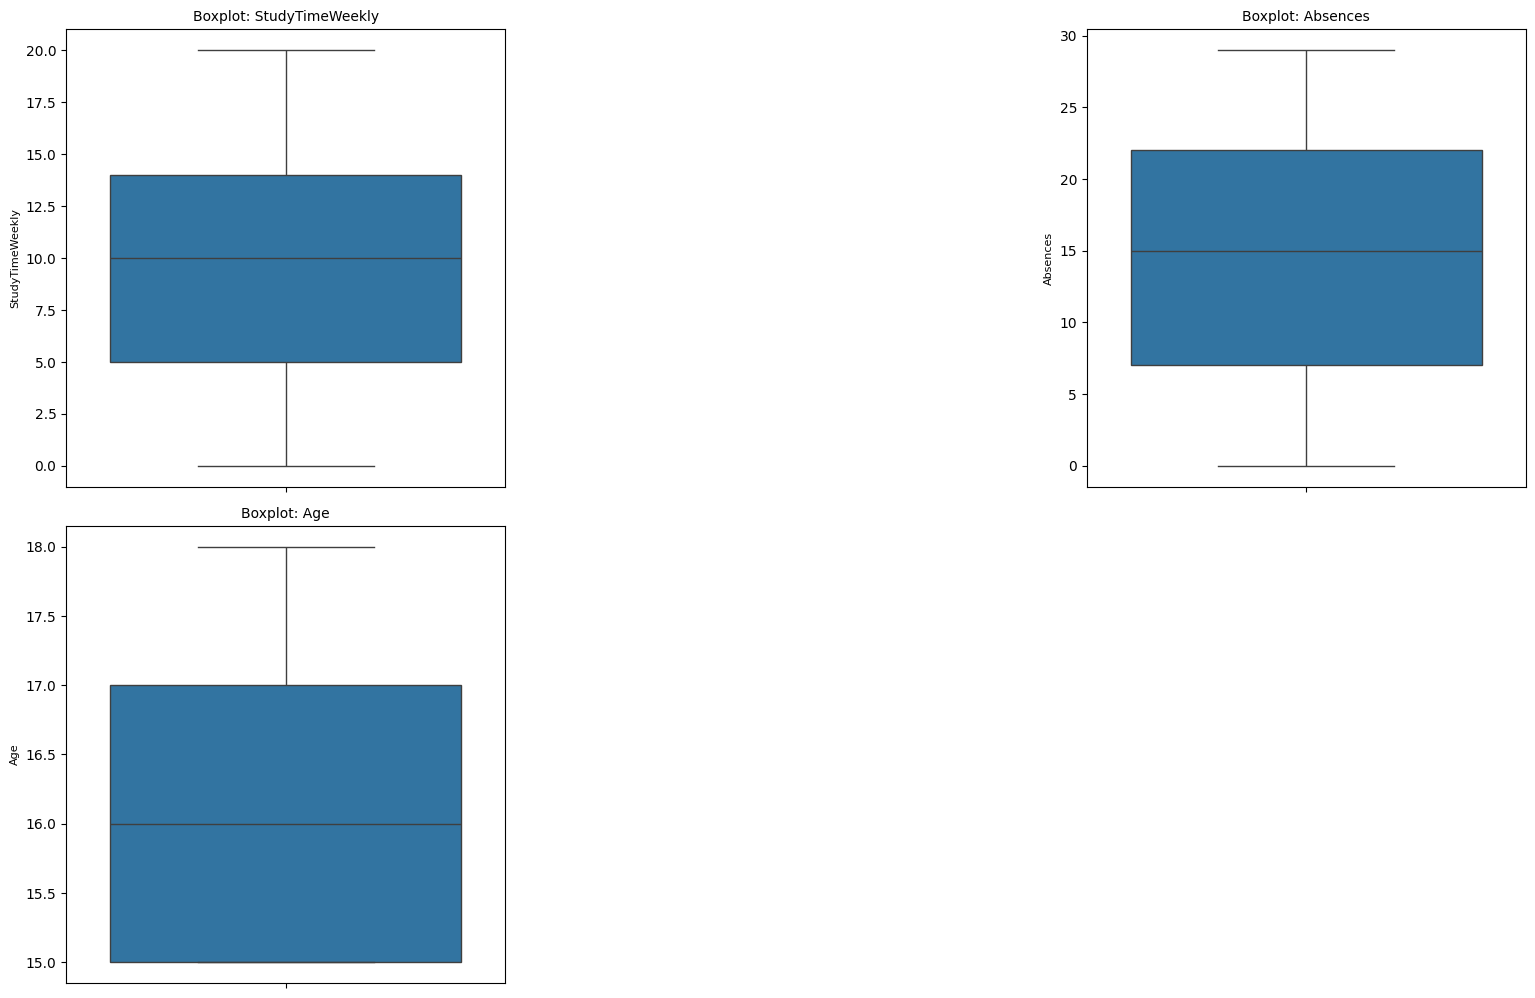

In [1641]:
def diagnostic_plots2(dfc, variables, cols=4, max_plots_per_figure=20):
    num_vars = len(variables)
    num_figures = (num_vars * 2 + max_plots_per_figure - 1) // max_plots_per_figure  # +num_vars karena ada dua plot per variabel

    for fig_num in range(num_figures):
        start_index = fig_num * max_plots_per_figure // 2
        end_index = min(start_index + max_plots_per_figure // 2, num_vars)
        current_vars = variables[start_index:end_index]

        # Define figure size with dynamic adjustment for better fit
        plt.figure(figsize=(cols * 5, len(current_vars) * 5))  # Adjust the size as needed

        for i, variable in enumerate(current_vars): 
            plt.subplot(len(current_vars), cols, i * 2 + 2)  # Boxplot
            sns.boxplot(y=dfc[variable])
            plt.title(f'Boxplot: {variable}', fontsize=10)
            plt.ylabel(variable, fontsize=8)

        plt.tight_layout()  # Adjust subplots to fit into figure area.
        plt.show()

# Misalkan list_num_cols adalah daftar nama kolom numerik
list_num_cols = ['StudyTimeWeekly', 'Absences', 'Age']

# Plot untuk semua kolom dalam list_num_cols
diagnostic_plots2(dfc, list_num_cols, cols=4)

In [1642]:
def find_boundaries(dfc_impute, variables, distance=1.5):
    boundaries = {}
    
    for var, dist_type in variables.items():
        if dist_type == 'normal':
            # Hitung batas normal
            upper_boundary = dfc_impute[var].mean() + 3 * dfc_impute[var].std()
            lower_boundary = dfc_impute[var].mean() - 3 * dfc_impute[var].std()
        
        elif dist_type == 'skewed':
            # Hitung batas skewed
            IQR = dfc_impute[var].quantile(0.75) - dfc_impute[var].quantile(0.25)
            lower_boundary = dfc_impute[var].quantile(0.25) - (IQR * distance)
            upper_boundary = dfc_impute[var].quantile(0.75) + (IQR * distance)
        
        elif dist_type == 'extreme':
            # Hitung batas ekstrem
            IQR = dfc_impute[var].quantile(0.75) - dfc_impute[var].quantile(0.25)
            lower_boundary = dfc_impute[var].quantile(0.25) - (IQR * distance)
            upper_boundary = dfc_impute[var].quantile(0.75) + (IQR * distance)
        
        else:
            raise ValueError(f'Jenis distribusi "{dist_type}" tidak dikenali.')
        
        # Hitung persentase outlier di atas dan di bawah batas
        percentage_upper_outliers = (len(dfc_impute[dfc_impute[var] > upper_boundary]) / len(dfc_impute)) * 100
        percentage_lower_outliers = (len(dfc_impute[dfc_impute[var] < lower_boundary]) / len(dfc_impute)) * 100
        
        # Simpan hasil
        boundaries[var] = {
            'upper': upper_boundary,
            'lower': lower_boundary,
            'percentage_upper_outliers': percentage_upper_outliers,
            'percentage_lower_outliers': percentage_lower_outliers
        }
    
    # Konversi hasil ke DataFrame
    boundaries_df = pd.DataFrame(boundaries).T
    boundaries_df.index.name = 'Variable'
    
    return boundaries_df

In [1643]:
# Example usage:
variables = {
    'StudyTimeWeekly': 'normal',
    'Absences': 'normal',
    'Age' : 'normal'
    # Add other variables as needed
}

# Call the function and assign the result to a variable
boundaries_df = find_boundaries(dfc, variables)
# Tampilkan DataFrame hasil
boundaries_df

,upper,lower,percentage_upper_outliers,percentage_lower_outliers
Variable,,,,
StudyTimeWeekly,26.776450,-7.240497,0.0,0.0
Absences,39.943640,-10.860864,0.0,0.0
Age,19.840041,13.097250,0.0,0.0


- Distribusi data pada semua kolom numerical ini adalah normal
- Karena semua kolom memiliki distribusi data normal, digunakan Z-score untuk mencari nilai outlier
- Tidak ditemukan outlier pada ketiga kolom tersebut, dapat dilihat dari visualisasi dan hasil z-score

## 5.5 Feature Selection

In [1644]:
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X_train,y_train)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

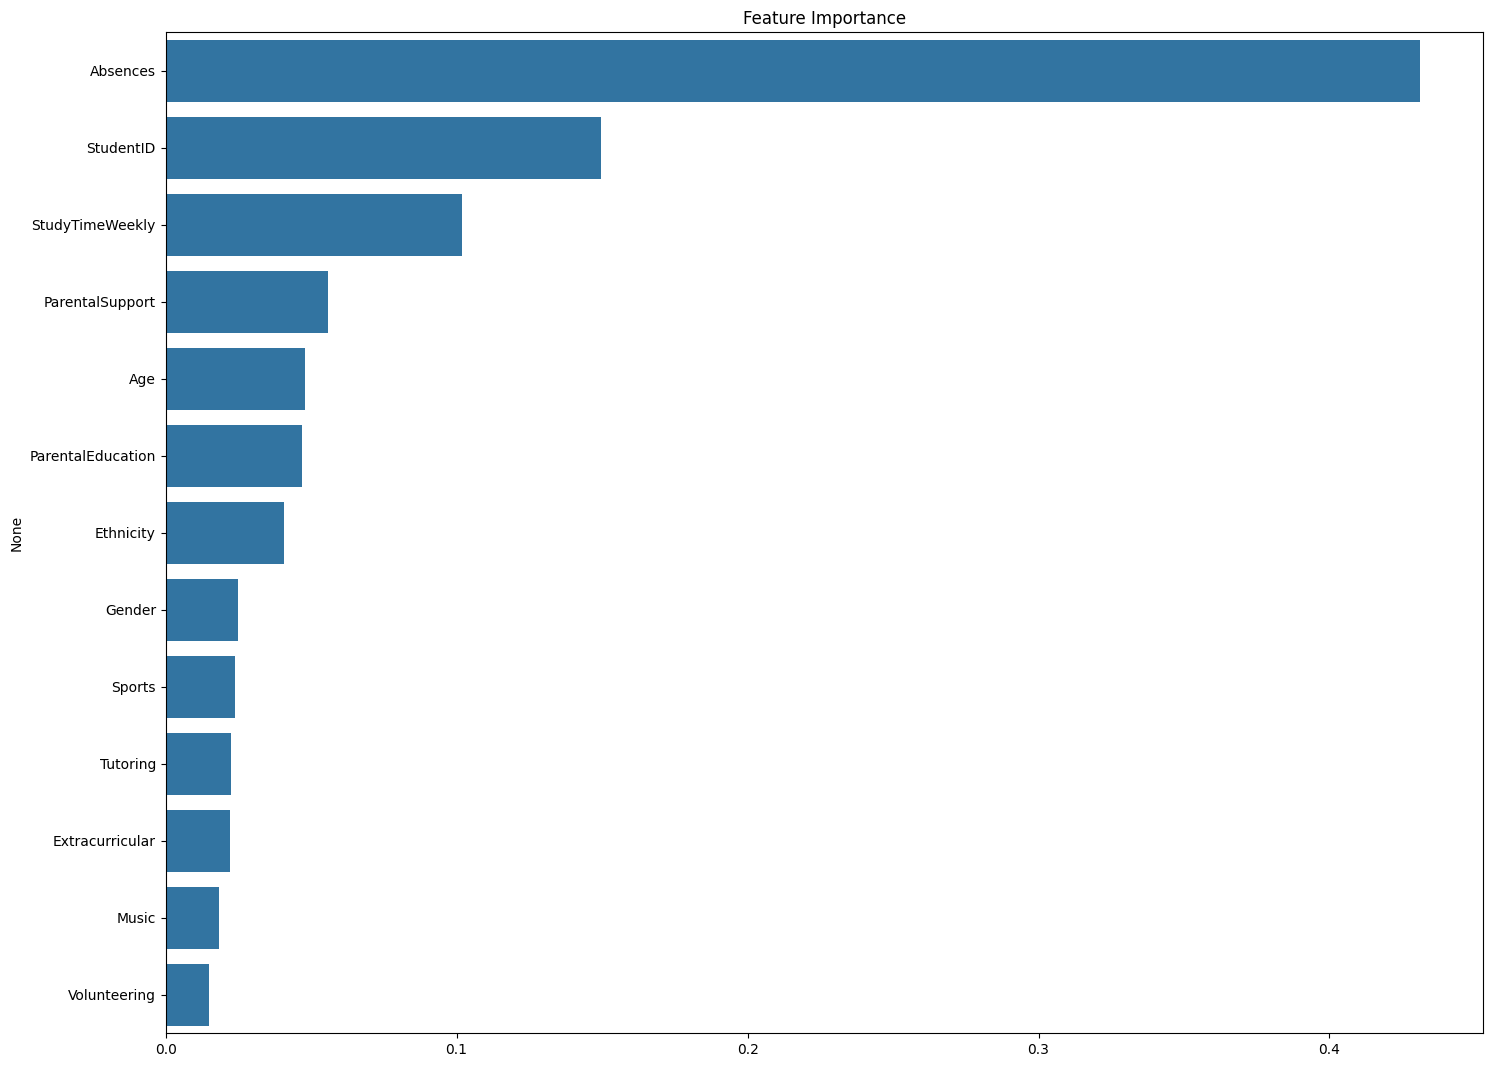

In [1645]:
plt.figure(figsize=(17,13))
plt.title("Feature Importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

Feature - feature seperti Absences dan StudyTimeWeekly memiliki pengaruh yang sangat besar terhadap prediksi model. Sementara itu, faktor lain seperti Gender, Ethnicity, dan Sports menunjukkan tingkat pengaruh yang lebih rendah, yang mengindikasikan bahwa mereka memiliki pengaruh lebih kecil terhadap variabel target dalam model.

# 6. Model Definition & Training

In [1646]:
# membagi kolom numeric dan kategorikal tanpa target
list_num_cols2 = ['StudyTimeWeekly', 'Absences', 'Age']

list_cat_cols2 = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 
                    'Music', 'Volunteering']

In [1647]:
# Hitung jumlah dan persentase
counts = y.value_counts()
percentages = y.value_counts(normalize=True) * 100

# Format persentase dengan dua angka di belakang koma
percentages = percentages.round(2)

# Gabungkan ke dalam satu DataFrame
df_summary = pd.DataFrame({
    'Count': counts,
    'Percentage': percentages
})

print(df_summary)

            Count  Percentage
GradeClass                   
4.0          1211       50.63
3.0           414       17.31
2.0           391       16.35
1.0           269       11.25
0.0           107        4.47


- Terdapat perbedaan proporsi data yang cukup jauh antar classnya, proportion of minority classnya berada di range 1 - 20% sehingga ini termasuk kedalam kategori 'Moderate'
- Dikarenakan dataset ini hanya memiliki 2392 data, terlalu sedikit jika menggunakan teknik undersampling sehingga diputuskan akan menggunakan metode SMOTETomek, yaitu kombinasi antara teknik undersampling dan oversampling.
- SMOTETomek akan dimasukkan kedalam pipeline lalu akan dilihat jumlah proporsi data terbarunya.

## 6.1 Conceptual Problem

### 6.1.1 Latar belakang Bagging & Cara Kerjanya

Bootstrap Aggregating atau yang biasa disebut juga sebagai Bagging adalah salah satu metode dasar dalam machine learning yang sering digunakan untuk mengurangi variabilitas dan overfitting pada model. Konsep ini diperkenalkan oleh Leo Breiman pada tahun 1994. Leo Breiman berpendapat bahwa Bagging dapat meningkatkan akurasi dan stabilitas model (source: https://www.stat.berkeley.edu/~breiman/bagging.pdf)

Bagging melakukan training pada beberapa model secara independen (parallel training) dengan cara mengambil data secara acak, dan hasil prediksi akhirnya akan digabungkan melalui voting (untuk klasifikasi) atau menggunakan rata - rata (untuk regresi)

### 6.1.2  Perbedaan algoritma Random Forest dengan algoritma XGBoost

- Random forest adalah algoritma yang menggabungkan banyak decision trees untuk membuat prediksi yang lebih stabil dan akurat. Random forest menggunakan teknik ensemble bagging. Dalam random forest, setiap decision tree dilatih secara independen (parallel training) menggunakan data yang acak. Untuk klasifikasi, output prediksi akhir yang akan dihasilkan oleh random forest akan menggunakan suara mayoritas (majority voting) dari semua decision tree. Untuk regresi, output prediksi akhir nya adalah rata-rata dari prediksi semua decision tree. Random Forest mengurangi variabilitas dan membantu menghindari overfitting

- XGBoost adalah algoritma yang hanya membuat satu model pada satu waktu, lalu mempelajari kesalahan yang disebabkan oleh model tersebut, kemudian membuat sebuah model baru lagi untuk diperbaiki kesalahan dari model sebelumnya. XGBoost menggunakan algoritma meminimalkan error saat menambahkan model baru. Penambahan model baru secara berurutan ini memastikan bahwa kekurangan model sebelumnya diperbaiki. Output dari XGBoost ini adalah prediksi dari masing - masing model digabungkan tetapi hasil prediksi tersebut memiliki bobot yang berbeda.

(source: https://www.geeksforgeeks.org/difference-between-random-forest-vs-xgboost/#random-forest-vs-xgboost-algorithmic-approach)

### 6.1.3 Jelaskan apa yang dimaksud dengan Cross Validation

Cross validation adalah teknik untuk mengevaluasi model dalam machine learning yang digunakan untuk mengukur seberapa baik model dapat diharapkan bekerja pada data baru dan data yang tidak terlihat. Pada cross validation, data yang tersedia akan dibagi menjadi beberapa subset, biasanya disebut fold, supaya dapat dilakukan pelatihan dan pengujian model berkali-kali.
Hasil dari setiap subset tersebut dirata-ratakan untuk menghasilkan estimasi performa model yang lebih kuat. Cross validation merupakan langkah penting dalam proses machine learning untuk membantu memastikan bahwa model yang dipilih untuk deployment dapat diaplikasikan dengan baik ke data baru.

(source: https://www.geeksforgeeks.org/cross-validation-machine-learning/)

## 6.2 SVM Model

In [1648]:
# Transformer untuk fitur numerik
numeric_transformer = ImbPipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing untuk fitur numerik dan kategori
preprocessor = ColumnTransformer(
    transformers=[
        ('pipe_num', numeric_transformer, list_num_cols2),
        ('pipe_cat', 'passthrough', list_cat_cols2)
    ]
)

# Definisikan SMOTE-Tomek
smote_tomek = SMOTETomek(sampling_strategy='auto', tomek=TomekLinks(sampling_strategy='majority'), random_state=19)

# Gabungkan preprocessing, SMOTE-Tomek, dan classifier dalam satu pipeline
svc_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote_tomek', smote_tomek),
    ('classifier', SVC(random_state=42))
])

# Fit pipeline pada data training
svc_pipeline.fit(X_train, y_train)

# Menampilkan pipeline yang telah dibuat
svc_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'Absences', 'Age']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Gender', 'Ethnicity',
                                                   'ParentalEducation',
                                                   'Tutoring',
                                                   'ParentalSupport',
                                                   'Extracurricular', 'Sports',
                                                   'Music',
                                                   'Volunteering'])])),
                ('smote_tomek',
                 SMOTETomek(random_state=19,
                            tomek=TomekLinks(sampling_strategy='majority'))),
                ('classifier', SVC(random_state=42))])

In [1649]:
# Buat prediksi pada data uji
svc_pred = svc_pipeline.predict(X_test)

In [1650]:
a , b = svc_pipeline.named_steps["smote_tomek"].fit_resample(X_train,y_train)
b.value_counts()

GradeClass
4.0    974
1.0    974
2.0    974
3.0    974
0.0    944
Name: count, dtype: int64

## 6.3 Decision Tree Model

In [1651]:
# Transformer untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing untuk fitur numerik dan kategori
preprocessor = ColumnTransformer(
    transformers=[
        ('pipe_num', numeric_transformer, list_num_cols2),
        ('pipe_cat', 'passthrough', list_cat_cols2)
    ]
)

# Definisikan SMOTE-Tomek
smote_tomek = SMOTETomek(sampling_strategy='auto', tomek=TomekLinks(sampling_strategy='majority'), random_state=19)

# Gabungkan preprocessing, SMOTE-Tomek, dan classifier dalam satu pipeline
dt_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote_tomek', smote_tomek),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit pipeline pada data training
dt_pipeline.fit(X_train, y_train)

# Menampilkan pipeline yang telah dibuat
dt_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'Absences', 'Age']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Gender', 'Ethnicity',
                                                   'ParentalEducation',
                                                   'Tutoring',
                                                   'ParentalSupport',
                                                   'Extracurricular', 'Sports',
                                                   'Music',
                                                   'Volunteering'])])),
                ('smote_tomek',
                 SMOTETomek(random_state=19,
                            tomek=TomekLinks(sampling_strategy='majority'))),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [1652]:
# Buat prediksi pada data uji
dt_pred = dt_pipeline.predict(X_test)

In [1653]:
a , b = dt_pipeline.named_steps["smote_tomek"].fit_resample(X_train,y_train)
print ("Distribusi data setelah dilakukan balancing")
b.value_counts()

Distribusi data setelah dilakukan balancing


GradeClass
4.0    974
1.0    974
2.0    974
3.0    974
0.0    944
Name: count, dtype: int64

## 6.4 Random Forest Model

In [1654]:
# Transformer untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing untuk fitur numerik dan kategori
preprocessor = ColumnTransformer(
    transformers=[
        ('pipe_num', numeric_transformer, list_num_cols2),
        ('pipe_cat', 'passthrough', list_cat_cols2)
    ]
)

# Definisikan SMOTE-Tomek
smote_tomek = SMOTETomek(sampling_strategy='auto', tomek=TomekLinks(sampling_strategy='majority'), random_state=19)

# Gabungkan preprocessing, SMOTE-Tomek, dan classifier dalam satu pipeline
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote_tomek', smote_tomek),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit pipeline pada data training
rf_pipeline.fit(X_train, y_train)

# Menampilkan pipeline yang telah dibuat
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'Absences', 'Age']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Gender', 'Ethnicity',
                                                   'ParentalEducation',
                                                   'Tutoring',
                                                   'ParentalSupport',
                                                   'Extracurricular', 'Sports',
                                                   'Music',
                                                   'Volunteering'])])),
                ('smote_tomek',
                 SMOTETomek(random_state=19,
                            tomek=TomekLinks(sampling_strategy='majority'))),
                ('classifier', RandomForestClassifier(random_state=42))])

In [1655]:
# Buat prediksi pada data uji
rf_pred = rf_pipeline.predict(X_test)

In [1656]:
a , b = rf_pipeline.named_steps["smote_tomek"].fit_resample(X_train,y_train)
print ("Distribusi data setelah dilakukan balancing")
b.value_counts()

Distribusi data setelah dilakukan balancing


GradeClass
4.0    974
1.0    974
2.0    974
3.0    974
0.0    944
Name: count, dtype: int64

## 6.5 KNN Model

In [1657]:
# Transformer untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing untuk fitur numerik dan kategori
preprocessor = ColumnTransformer(
    transformers=[
        ('pipe_num', numeric_transformer, list_num_cols2),
        ('pipe_cat', 'passthrough', list_cat_cols2)
    ]
)

# Definisikan SMOTE-Tomek
smote_tomek = SMOTETomek(sampling_strategy='auto', tomek=TomekLinks(sampling_strategy='majority'), random_state=19)

# Gabungkan preprocessing, SMOTE-Tomek, dan classifier dalam satu pipeline
knn_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote_tomek', smote_tomek),
    ('classifier', KNeighborsClassifier())
])

# Fit pipeline pada data training
knn_pipeline.fit(X_train, y_train)

# Menampilkan pipeline yang telah dibuat
knn_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'Absences', 'Age']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Gender', 'Ethnicity',
                                                   'ParentalEducation',
                                                   'Tutoring',
                                                   'ParentalSupport',
                                                   'Extracurricular', 'Sports',
                                                   'Music',
                                                   'Volunteering'])])),
                ('smote_tomek',
                 SMOTETomek(random_state=19,
                            tomek=TomekLinks(sampling_strategy='majority'))),
                ('classifier', KNeighborsClassifier())])

In [1658]:
# Buat prediksi pada data uji
knn_pred = knn_pipeline.predict(X_test)

In [1659]:
a , b = knn_pipeline.named_steps["smote_tomek"].fit_resample(X_train,y_train)
print ("Distribusi data setelah dilakukan balancing")
b.value_counts()

Distribusi data setelah dilakukan balancing


GradeClass
4.0    974
1.0    974
2.0    974
3.0    974
0.0    944
Name: count, dtype: int64

## 6.6 Boosting

In [1660]:
# Transformer untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing untuk fitur numerik dan kategori
preprocessor = ColumnTransformer(
    transformers=[
        ('pipe_num', numeric_transformer, list_num_cols2),
        ('pipe_cat', 'passthrough', list_cat_cols2)
    ]
)

# Definisikan SMOTE-Tomek
smote_tomek = SMOTETomek(sampling_strategy='auto', tomek=TomekLinks(sampling_strategy='majority'), random_state=19)

# Gabungkan preprocessing, SMOTE-Tomek, dan classifier dalam satu pipeline
boost_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote_tomek', smote_tomek),
    ('classifier', xgb.XGBClassifier())
])

# Fit pipeline pada data training
boost_pipeline.fit(X_train, y_train)

# Menampilkan pipeline yang telah dibuat
boost_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'Absences', 'Age']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Gender', 'Ethnicity',
                                                   'ParentalEducation',
                                                   'Tutoring',
                                                   'ParentalSupport',
                                                   'Extracurricular', 'Sports',
                                                   'Music',
                                                   'Volunteering'])])),
                ('smote_tomek',
                 SMOTETomek(random_state...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [1661]:
# Buat prediksi pada data uji
boost_pred = boost_pipeline.predict(X_test)

In [1662]:
a , b = boost_pipeline.named_steps["smote_tomek"].fit_resample(X_train,y_train)
print ("Distribusi data setelah dilakukan balancing")
b.value_counts()

Distribusi data setelah dilakukan balancing


GradeClass
4.0    974
1.0    974
2.0    974
3.0    974
0.0    944
Name: count, dtype: int64

- Digunakan 5 tipe model klasifikasi dalam project ini, yaitu SVC, Decision Tree, Random Forest, KNN, dan XGBClassifier
- Setelah digunakan metode SMOTETomek, proporsi data antar classnya menjadi seimbang, kecuali kelas '0'
- Semua model menggunakan StandartScaler dikarenakan distribusi data pada dataset ini adalah normal
- Dataset ini sudah diencoding sebelumnya, sehingga proses encodernya di passthrough (dilewati)

# 7. Model Evaluation

Pada model evaluation ini, diputuskan bahwa akan menggunakan metrik RMSE juga. Meskipun lebih sering digunakan dalam konteks regresi, RMSE juga dapat diterapkan dalam konteks ordinal classification. Ini karena metrik ini digunakan untuk mengukur nilai error antara predikasi dan nilai actualnya yang bisa menjadi relevan dalam konteks prediksi ordinal. (Source: https://www.researchgate.net/publication/221442240_Evaluation_Methods_for_Ordinal_Classification)

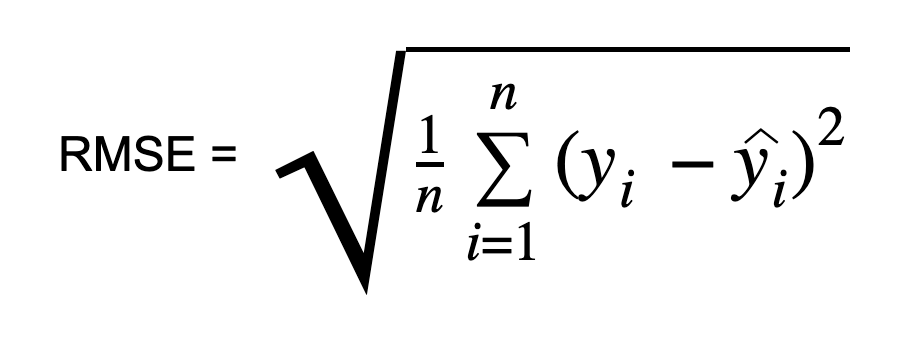

## 7.1 SVM

In [1663]:
# Confusion Matrix - Train Set
svm_cm = confusion_matrix(y_train, svc_pipeline.predict(X_train))

print('Confusion Matrix : \n', svm_cm)

Confusion Matrix : 
 [[ 68   5   1   5   6]
 [ 33 141  18   9  19]
 [ 22  39 198  34  13]
 [ 10   6  36 254  22]
 [ 14   6   4  96 854]]


In [1664]:
print(classification_report(y_train, svc_pipeline.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.46      0.80      0.59        85
         1.0       0.72      0.64      0.68       220
         2.0       0.77      0.65      0.70       306
         3.0       0.64      0.77      0.70       328
         4.0       0.93      0.88      0.90       974

    accuracy                           0.79      1913
   macro avg       0.70      0.75      0.71      1913
weighted avg       0.81      0.79      0.80      1913



In [1665]:
# Model Evaluation - Test Set
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

         0.0       0.31      0.41      0.35        22
         1.0       0.45      0.51      0.48        49
         2.0       0.57      0.51      0.53        85
         3.0       0.51      0.53      0.52        86
         4.0       0.89      0.86      0.87       237

    accuracy                           0.68       479
   macro avg       0.54      0.56      0.55       479
weighted avg       0.69      0.68      0.69       479



- Model berkinerja lebih baik pada data training dibandingkan pada data test. Penurunan pada semua metriks evaluasi menunjukkan adanya masalah overfitting, di mana model belajar sangat baik pada data pelatihan tetapi tidak digeneralisasi dengan baik pada data baru.

- Model menunjukkan penurunan kinerja yang signifikan dalam mengidentifikasi kelas 0, kinerja pada kelas 1, 2, dan 3 juga menurun pada test set yang menandakan bahwa model mungkin mengalami kesulitan dalam mengenali pola pada kelas ini ketika diuji pada data baru. 

- Kelas 4 menunjukkan penurunan kinerja, tetapi tidak terlalu signifikan jika dibandingkan dengan kelas lainnya.

In [1666]:
# Cross-validation dengan f1
svc_train_cross_val = cross_val_score(svc_pipeline,
                                          X_train,
                                          y_train,
                                          cv=5,
                                          scoring="f1_macro")

print('SVC - All - Cross Validation  : ', svc_train_cross_val)
print('SVC - Mean - Cross Validation : ', svc_train_cross_val.mean())
print('SVC - Std - Cross Validation  : ', svc_train_cross_val.std())
print('SVC - Range of Test-Set       : ', (svc_train_cross_val.mean() - svc_train_cross_val.std()), '-', (svc_train_cross_val.mean() + svc_train_cross_val.std()))


SVC - All - Cross Validation  :  [0.53308168 0.48427983 0.56812693 0.53036227 0.53041039]
SVC - Mean - Cross Validation :  0.5292522205743524
SVC - Std - Cross Validation  :  0.026649565537161024
SVC - Range of Test-Set       :  0.5026026550371914 - 0.5559017861115134


-  Rata-rata akurasi model SVC sekitar 52.9%, Deviasi standarnya kecil hanya sekitar 0.02, yang menunjukkan konsistensi yang baik dalam hal performa di berbagai fold, walaupun rata-rata akurasi hanya sekitar 52.9%.

- Rentang test-set menunjukkan ada sedikit variasi dalam akurasi model di berbagai fold, dengan perbedaan antara akurasi terendah dan tertinggi sekitar 5.3%.

In [1667]:
# # Predict on test data
svc_mse = mean_squared_error(y_test, svc_pred)
# Compute RMSE
svc_rmse = np.sqrt(svc_mse)
print(f'Root Mean Squared Error: {svc_rmse}')

Root Mean Squared Error: 0.8608875354208622


RMSE memiliki nilai 0.8609 yang mana ini relatif kecil jika dibandingkan dengan rentang keseluruhan (0-4). Ini mengindikasikan bahwa model memiliki kinerja yang cukup baik dalam hal akurasi prediksi.

## 7.2 Decision Tree Evaluation

In [1668]:
print(classification_report(y_train, dt_pipeline.predict(X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        85
         1.0       1.00      1.00      1.00       220
         2.0       1.00      1.00      1.00       306
         3.0       1.00      1.00      1.00       328
         4.0       1.00      1.00      1.00       974

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913



In [1669]:
# Model Evaluation - Test Set
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.22      0.32      0.26        22
         1.0       0.33      0.47      0.39        49
         2.0       0.39      0.36      0.38        85
         3.0       0.31      0.29      0.30        86
         4.0       0.83      0.77      0.80       237

    accuracy                           0.56       479
   macro avg       0.42      0.44      0.43       479
weighted avg       0.58      0.56      0.57       479



- Precision, recall, F1-score, dan akurasi memiliki nilai 1.00 untuk setiap kelasnya, yang menunjukkan bahwa model memprediksi setiap kelas dengan sempurna di data training. Macro avg dan weighted avg juga menunjukkan kinerja sempurna di seluruh kelas.

- Model termasuk kedalam kategori overfit. Performa pada training set menunjukkan nilai sempurna, sedangkan kinerja pada data set test menunjukkan bahwa model tidak dapat menilai dengan baik data yang belum pernah dilihat sebelumnya.

In [1670]:
# Cross-validation dengan f1
dt_train_cross_val = cross_val_score(dt_pipeline,
                                          X_train,
                                          y_train,
                                          cv=5,
                                          scoring="f1_macro")

print('DT - All - Cross Validation  : ', dt_train_cross_val)
print('DT - Mean - Cross Validation : ', dt_train_cross_val.mean())
print('DT - Std - Cross Validation  : ', dt_train_cross_val.std())
print('DT - Range of Test-Set       : ', (dt_train_cross_val.mean() - dt_train_cross_val.std()), '-', (dt_train_cross_val.mean() + dt_train_cross_val.std()))


DT - All - Cross Validation  :  [0.47175992 0.42992005 0.46042365 0.45194182 0.44784534]
DT - Mean - Cross Validation :  0.4523781566945414
DT - Std - Cross Validation  :  0.01389594086836373
DT - Range of Test-Set       :  0.4384822158261777 - 0.4662740975629051


- Akurasi dibawah rata - rata, dengan nilai sebesar 45.2%, model Decision Tree menunjukkan performa yang lebih rendah daripada model SVC. 

- Deviasi standar yang rendah 0.0139 menunjukkan bahwa model memberikan hasil yang relatif konsisten.

In [1671]:
# # Predict on test data
dt_mse = mean_squared_error(y_test, dt_pred)
# Compute RMSE
dt_rmse = np.sqrt(dt_mse)
print(f'Root Mean Squared Error: {dt_rmse}')

Root Mean Squared Error: 1.1201327091075084


RMSE 1.12 menunjukkan bahwa model memiliki kesalahan prediksi yang cukup signifikan jika rentang nilai 0 - 4. RMSE yang lebih besar dari 1 menunjukkan bahwa model mungkin tidak akurat dan tidak efektif dalam memprediksi nilai.

## 7.3 Random Forest Model Evaluation

In [1672]:
print(classification_report(y_train, rf_pipeline.predict(X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        85
         1.0       1.00      1.00      1.00       220
         2.0       1.00      1.00      1.00       306
         3.0       1.00      1.00      1.00       328
         4.0       1.00      1.00      1.00       974

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913



In [1673]:
# Model Evaluation - Test Set
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.18      0.27        22
         1.0       0.46      0.53      0.50        49
         2.0       0.53      0.54      0.53        85
         3.0       0.53      0.47      0.50        86
         4.0       0.86      0.92      0.89       237

    accuracy                           0.70       479
   macro avg       0.58      0.53      0.54       479
weighted avg       0.69      0.70      0.69       479



- Precision, recall, F1-score, dan akurasi memiliki nilai 1.00 untuk setiap kelasnya, yang menunjukkan bahwa model memprediksi setiap kelas dengan sempurna di data training. Macro avg dan weighted avg juga menunjukkan kinerja sempurna di seluruh kelas.

- Model Random Forest menunjukkan performa sempurna pada data training set namun mengalami penurunan kinerja yang signifikan pada data test set, menunjukkan adanya overfitting. Model sangat spesifik terhadap data training dan tidak dapat generalisasi dengan baik pada data baru.

In [1674]:
# Cross-validation dengan f1
rf_train_cross_val = cross_val_score(rf_pipeline,
                                          X_train,
                                          y_train,
                                          cv=5,
                                          scoring="f1_macro")

print('RF - All - Cross Validation  : ', rf_train_cross_val)
print('RF - Mean - Cross Validation : ', rf_train_cross_val.mean())
print('RF - Std - Cross Validation  : ', rf_train_cross_val.std())
print('RF - Range of Test-Set       : ', (rf_train_cross_val.mean() - rf_train_cross_val.std()), '-', (rf_train_cross_val.mean() + rf_train_cross_val.std()))

RF - All - Cross Validation  :  [0.53044255 0.58531064 0.55024019 0.52944635 0.57546266]
RF - Mean - Cross Validation :  0.5541804764117287
RF - Std - Cross Validation  :  0.0228596188237103
RF - Range of Test-Set       :  0.5313208575880184 - 0.5770400952354391


- Dengan rata-rata nilai akurasi sekitar 55.4%, model Random Forest menunjukkan performa yang cukup baik dibandingkan 2 model sebelumnya, tetapi tidak jauh berbeda. Model memiliki kemampuan yang lebih baik dalam mengklasifikasikan data, namun masih banyak perbaikan yang haris dilakukan.

- Deviasi standar yang rendah menunjukkan bahwa model memberikan hasil yang konsisten di seluruh fold. Variasi performa antara fold cukup kecil, menandakan stabilitas model.

In [1675]:
# # Predict on test data
rf_mse = mean_squared_error(y_test, rf_pred)
# Compute RMSE
rf_rmse = np.sqrt(rf_mse)
print(f'Root Mean Squared Error: {rf_rmse}')

Root Mean Squared Error: 0.77809252338511


Dengan rentang nilai dari 0 - 4, RMSE 0.7781 dapat dianggap relatif kecil jika dibandingkan dengan rentang nilai tersebut. Ini menunjukkan bahwa model memiliki kesalahan prediksi yang tidak terlalu besar dan model secara keseluruhan menunjukkan performa yang cukup baik..

## 7.4 KNN Model Evaluation

In [1676]:
print(classification_report(y_train, knn_pipeline.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.54      1.00      0.71        85
         1.0       0.80      0.96      0.87       220
         2.0       0.80      0.91      0.85       306
         3.0       0.67      0.88      0.76       328
         4.0       0.98      0.72      0.83       974

    accuracy                           0.82      1913
   macro avg       0.76      0.89      0.80      1913
weighted avg       0.86      0.82      0.82      1913



In [1677]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.11      0.23      0.15        22
         1.0       0.23      0.31      0.26        49
         2.0       0.26      0.28      0.27        85
         3.0       0.26      0.35      0.30        86
         4.0       0.89      0.60      0.72       237

    accuracy                           0.45       479
   macro avg       0.35      0.35      0.34       479
weighted avg       0.56      0.45      0.49       479



- Model KNN mengalami overfitting, di mana performasi sangat baik pada data training set tetapi buruk pada data test set.

- Kinerja model pada data test set menunjukkan bahwa model mungkin tidak generalisasi dengan baik ke data baru atau tidak menangkap pola yang diperlukan untuk klasifikasi yang akurat.

In [1678]:
# Cross-validation dengan f1
knn_train_cross_val = cross_val_score(knn_pipeline,
                                          X_train,
                                          y_train,
                                          cv=5,
                                          scoring="f1_macro")

print('KNN - All - Cross Validation  : ', knn_train_cross_val)
print('KNN - Mean - Cross Validation : ', knn_train_cross_val.mean())
print('KNN - Std - Cross Validation  : ', knn_train_cross_val.std())
print('KNN - Range of Test-Set       : ', (knn_train_cross_val.mean() - knn_train_cross_val.std()), '-', (knn_train_cross_val.mean() + knn_train_cross_val.std()))


KNN - All - Cross Validation  :  [0.3659577  0.38537899 0.34205304 0.38335729 0.3547778 ]
KNN - Mean - Cross Validation :  0.36630496431863274
KNN - Std - Cross Validation  :  0.016587658527174774
KNN - Range of Test-Set       :  0.349717305791458 - 0.3828926228458075


- Skor rata - rata akurasi yang diperoleh adalah 36.63%, ini adalah skor paling rendah jika dibandingkan dengan 3 model sebelumnya. Ini menunjukkan bahwa model KNN tidak memiliki performansi yang sangat baik

- Deviasi standar yang rendah menunjukkan model cukup stabil walaupun nilai rata - rata akurasinya sangat rendah.

In [1679]:
# # Predict on test data
knn_mse = mean_squared_error(y_test, knn_pred)
# Compute RMSE
knn_rmse = np.sqrt(knn_mse)
print(f'Root Mean Squared Error: {knn_rmse}')

Root Mean Squared Error: 1.3805992466133965


RMSE yang relatif tinggi dengan nilai 1.38 dalam rentang kecil 0 - 4 menunjukkan bahwa model KNN tidak akurat dalam memprediksi nilai target. Kesalahan yang cukup besar ini mengindikasikan bahwa model mungkin tidak dapat menangkap pola dalam data dengan baik atau mungkin model ini tidak optimal untuk dataset ini.

## 7.5 Boost Model Evaluation

In [1680]:
print(classification_report(y_train, boost_pipeline.predict(X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        85
         1.0       1.00      1.00      1.00       220
         2.0       1.00      1.00      1.00       306
         3.0       1.00      1.00      1.00       328
         4.0       1.00      1.00      1.00       974

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913



In [1681]:
print(classification_report(y_test, boost_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.23      0.31        22
         1.0       0.44      0.51      0.47        49
         2.0       0.52      0.51      0.51        85
         3.0       0.49      0.41      0.44        86
         4.0       0.86      0.93      0.89       237

    accuracy                           0.68       479
   macro avg       0.56      0.52      0.53       479
weighted avg       0.67      0.68      0.67       479



- Overfitting terlihat jelas, model XGBoost menunjukkan performa sempurna pada data training set namun mengalami penurunan kinerja yang signifikan pada data test set, yang menunjukkan adanya overfitting. Model sangat spesifik terhadap data training set dan tidak dapat menggeneralisasi dengan baik pada data baru.

- Model memiliki performa yang sangat baik untuk memprediksi class 4 tetapi sangat buruk pada class lainnya. Ini menunjukkan ketidakseimbangan atau ada masalah dalam representasi class tertentu dalam data training set.

In [1682]:
# Cross-validation dengan f1
boost_train_cross_val = cross_val_score(boost_pipeline,
                                          X_train,
                                          y_train,
                                          cv=5,
                                          scoring="f1_macro")

print('XGBOOST - All - Cross Validation  : ', boost_train_cross_val)
print('XGBOOST - Mean - Cross Validation : ', boost_train_cross_val.mean())
print('XGBOOST - Std - Cross Validation  : ', boost_train_cross_val.std())
print('XGBOOST - Range of Test-Set       : ', (boost_train_cross_val.mean() - boost_train_cross_val.std()), '-', (boost_train_cross_val.mean() + boost_train_cross_val.std()))


XGBOOST - All - Cross Validation  :  [0.56049937 0.55870607 0.4976185  0.54037571 0.56785316]
XGBOOST - Mean - Cross Validation :  0.545010560441327
XGBOOST - Std - Cross Validation  :  0.02536432046765313
XGBOOST - Range of Test-Set       :  0.5196462399736739 - 0.5703748809089801


- Dengan rata-rata akurasi sekitar 54.5%, model XGBoost menunjukkan performa yang diatas rata - rata, Tetapi masih banyak potensi untuk peningkatan.

-  Deviasi standar yang rendah, yaitu 2.54% menunjukkan bahwa performa model relatif stabil di seluruh fold. Rentang akurasi menunjukkan beberapa variasi dalam performa model, tetapi hasilnya cukup stabil.

In [1683]:
# # Predict on test data
boost_mse = mean_squared_error(y_test, boost_pred)
# Compute RMSE
boost_rmse = np.sqrt(boost_mse)
print(f'Root Mean Squared Error: {boost_rmse}')

Root Mean Squared Error: 0.7807709909392611


Secara keseluruhan, RMSE sebesar 0.780 menunjukkan bahwa model XGBoost memiliki performa yang baik jika rentang nilai target 0 - 4. Model ini memberikan prediksi yang cukup akurat dan kesalahan prediksi rata-rata relatif kecil.

# 8. Hyperparameter Tuning

- Dari hasil evaluasi ke 5 model tersebut, semua model menunjukkan overfitting. Beberapa model bahkan memiliki nilai training sempurna, yaitu 1. 

- Kemungkinan terjadi data leakage saat dilakukan preprocessing, sehingga menyebabkan nilai sempurna untuk semua metriknya atau mungkin data training tidak cukup banyak atau representatif.

- Rata - rata akurasi cross-validation semua model berada di sekitar kurang lebih 50%, kecuali untuk model KNN, dimana model tersebut memiliki rata - rata 36%.

- Nilai RMSE yang paling kecil adalah model random forest, sehingga random forest akan dilakukan tuning dan evaluasi lebih lanjut.

In [1684]:
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_search_params = {'classifier__n_estimators': n_estimators,
                        'classifier__max_depth':max_depth,
                        'classifier__min_samples_split':min_samples_split,
                        'classifier__min_samples_leaf':min_samples_leaf}
random_search_params

{'classifier__n_estimators': [200,
  400,
  600,
  800,
  1000,
  1200,
  1400,
  1600,
  1800,
  2000],
 'classifier__max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'classifier__min_samples_split': [2, 5, 10, 14],
 'classifier__min_samples_leaf': [1, 2, 4, 6, 8]}

In [1685]:
rf_randomcv = RandomizedSearchCV(rf_pipeline,
                                 param_distributions=random_search_params,
                                 n_iter=50,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='f1')
rf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('pipe_num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['StudyTimeWeekly',
                                                                                'Absences',
                                                                                'Age']),
                                                                              ('pipe_cat',
                                                                               'passthrough',
                                                                               ['Gender',
                                                                                'Ethnicity',
                                                                                'ParentalEducation',
                                                                                'Tutoring',
                                                                                'ParentalSupport',
                                                                                'Extracurricular',
                                                                                'Sports',
                                                                                'Music',
                                                                                'Volunteering'])])),
                                             ('sm...
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [10, 120, 230,
                                                                  340, 450, 560,
                                                                  670, 780, 890,
                                                                  1000],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4, 6,
                                                                         8],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10,
                                                                          14],
                                        'classifier__n_estimators': [200, 400,
                                                                     600, 800,
                                                                     1000, 1200,
                                                                     1400, 1600,
                                                                     1800,
                                                                     2000]},
                   random_state=46, scoring='f1')

In [1686]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_
rf_randomcv_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'Absences', 'Age']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Gender', 'Ethnicity',
                                                   'ParentalEducation',
                                                   'Tutoring',
                                                   'ParentalSupport',
                                                   'Extracurricular', 'Sports',
                                                   'Music',
                                                   'Volunteering'])])),
                ('smote_tomek',
                 SMOTETomek(random_state=19,
                            tomek=TomekLinks(sampling_strategy='majority'))),
                ('classifier',
                 RandomForestClassifier(max_depth=120, min_samples_leaf=8,
                                        min_samples_split=10, n_estimators=1200,
                                        random_state=42))])

# 9. Comparison Before - After Tuning

## 9.1 Before Tuning

In [1687]:
print(classification_report(y_train, rf_pipeline.predict(X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        85
         1.0       1.00      1.00      1.00       220
         2.0       1.00      1.00      1.00       306
         3.0       1.00      1.00      1.00       328
         4.0       1.00      1.00      1.00       974

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913



In [1688]:
# Model Evaluation - Test Set
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.18      0.27        22
         1.0       0.46      0.53      0.50        49
         2.0       0.53      0.54      0.53        85
         3.0       0.53      0.47      0.50        86
         4.0       0.86      0.92      0.89       237

    accuracy                           0.70       479
   macro avg       0.58      0.53      0.54       479
weighted avg       0.69      0.70      0.69       479



In [1689]:
# Cross-validation dengan f1
rf_train_cross_val = cross_val_score(rf_pipeline,
                                          X_train,
                                          y_train,
                                          cv=5,
                                          scoring="f1_macro")

print('RF - All - Cross Validation  : ', rf_train_cross_val)
print('RF - Mean - Cross Validation : ', rf_train_cross_val.mean())
print('RF - Std - Cross Validation  : ', rf_train_cross_val.std())
print('RF - Range of Test-Set       : ', (rf_train_cross_val.mean() - rf_train_cross_val.std()), '-', (rf_train_cross_val.mean() + rf_train_cross_val.std()))

RF - All - Cross Validation  :  [0.53044255 0.58531064 0.55024019 0.52944635 0.57546266]
RF - Mean - Cross Validation :  0.5541804764117287
RF - Std - Cross Validation  :  0.0228596188237103
RF - Range of Test-Set       :  0.5313208575880184 - 0.5770400952354391


In [1690]:
# # Predict on test data
rf_mse = mean_squared_error(y_test, rf_pred)
# Compute RMSE
rf_rmse = np.sqrt(rf_mse)
print(f'Root Mean Squared Error: {rf_rmse}')

Root Mean Squared Error: 0.77809252338511


## 9.2 After Tuning

In [1691]:
# Model Evaluation - Training Set
print(classification_report(y_train, rf_randomcv_best.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81        85
         1.0       0.89      0.80      0.84       220
         2.0       0.88      0.87      0.87       306
         3.0       0.74      0.82      0.78       328
         4.0       0.92      0.92      0.92       974

    accuracy                           0.87      1913
   macro avg       0.86      0.83      0.84      1913
weighted avg       0.88      0.87      0.87      1913



In [1692]:
# Model Evaluation - Test Set
print(classification_report(y_test, rf_randomcv_best.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.56      0.23      0.32        22
         1.0       0.49      0.51      0.50        49
         2.0       0.55      0.55      0.55        85
         3.0       0.52      0.56      0.54        86
         4.0       0.88      0.89      0.89       237

    accuracy                           0.70       479
   macro avg       0.60      0.55      0.56       479
weighted avg       0.70      0.70      0.70       479



In [1693]:
# Cross-validation dengan AUC-ROC
rf_train_cross_val = cross_val_score(rf_randomcv_best,
                                          X_train,
                                          y_train,
                                          cv=5,
                                          scoring="f1_macro")

print('RF - All - Cross Validation  : ', rf_train_cross_val)
print('RF - Mean - Cross Validation : ', rf_train_cross_val.mean())
print('RF - Std - Cross Validation  : ', rf_train_cross_val.std())
print('RF - Range of Test-Set       : ', (rf_train_cross_val.mean() - rf_train_cross_val.std()), '-', (rf_train_cross_val.mean() + rf_train_cross_val.std()))

RF - All - Cross Validation  :  [0.5747668  0.55834707 0.54296392 0.52832654 0.57981522]
RF - Mean - Cross Validation :  0.5568439114363798
RF - Std - Cross Validation  :  0.019272077375748566
RF - Range of Test-Set       :  0.5375718340606312 - 0.5761159888121283


In [1694]:
# # Predict on test data
rf_tuning_mse = mean_squared_error(y_test, rf_randomcv_best.predict(X_test))
# Compute RMSE
rf_tuning_rmse = np.sqrt(rf_tuning_mse)
print(f'Root Mean Squared Error: {rf_tuning_rmse}')

Root Mean Squared Error: 0.7549419643388708


- Digunakan random search untuk melakukan tuning untuk menghemat waktu.

- Hyperparameter tuning telah meningkatkan kinerja model pada data training dan test set, meskipun model masih menunjukkan perbedaan dalam kinerja antar classnya.

- Meskipun ada peningkatan, model tetap tidak mampu sepenuhnya menyelesaikan masalah overfitting, seperti yang terlihat dari performa pada data test set.

- Model menunjukkan peningkatan di class 0, 1, 2, dan 3 setelah tuning, tetapi hasilnya masih kurang memuaskan jika dibandingkan dengan class 4.

- Class 4 masih menunjukkan performa yang sangat baik, dibandingkan class lainnya.

- Hyperparameter tuning memberikan sedikit peningkatan dalam akurasi rata - rata akurasi cross validation model dari 55.4% menjadi 55.7%. Meskipun peningkatannya kecil, ini menunjukkan bahwa hyperparameter tuning telah memberikan efek positif.

- Standar deviasi menurun setelah tuning, menunjukkan bahwa kinerja model menjadi lebih konsisten di seluruh fold. Ini berarti bahwa hyperparameter tuning telah membantu mengurangi fluktuasi kinerja di antara subset data dan membuat performa menjadi lebih stabil.

- Rentang akurasi pada test-set sedikit menyusut setelah tuning, menunjukkan bahwa performa model lebih stabil.

- Penurunan RMSE menunjukkan bahwa hyperparameter tuning telah memberikan perbaikan pada model. Model yang dituning menghasilkan prediksi yang lebih akurat dan lebih konsisten, mengurangi kesalahan prediksi. Penurunan RMSE adalah indikasi bahwa model yang dituning mampu memberikan hasil yang lebih tepat. Meskipun penurunan ini mungkin terlihat kecil, perbaikan ini tetap signifikan dan mencerminkan peningkatan kinerja model

# 10. Model Saving

In [1695]:
import json
with open('rf.pkl','wb') as file_1:
  pickle.dump(rf_randomcv_best, file_1)

# 11. Kesimpulan

- Dilakukan pembuatan model klasifikasi untuk memprediksi Grade Class murid, sehingga model ini bisa digunakan untuk pihak sekolah, guru, dan orang tua murid untuk menaikkan nilai pada murid.

- Membuat 5 model klasifikasi untuk memprediksi Grade Class, yaitu SVC, decision tree, random forest, KNN, dan XGBoost. Model yang akan dipilih adalah model yang memberikan hasil terbaik. Semua model mengalami masalah overfitting

- Model yang akhirnya dipilih adalah random forest, karena nilai RMSE nya adalah yang paling kecil diantara model lainnya. Random forest ini kemudian akan dilakukan tuning untuk evaluasi lebih lanjut.

- Setelah dilakukan hyperparameter tuning, model random forest mengalami peningkatan walaupun tidak terlalu signifikan. 

- Final model yang dipilih untuk memprediksi Grade Class murid adalah random forest yang telah dilakukan hyper tuning. Dengan nilai error sebesar 0.75 diharapkan model ini mampu membantu pihak sekolah, guru, dan orang tua untuk meningkatkan nilai murid.

# 11. Model Inference

In [1696]:
# Load model
with open('rf.pkl', 'rb') as file_1:
    mode = pickle.load(file_1)

In [1697]:
dummy = {
    'StudentID': [8000],
    'Age': [17],
    'Gender': [0],
    'Ethnicity': [0],
    'ParentalEducation': [5],
    'StudyTimeWeekly': [20],
    'Absences': [0],
    'Tutoring': [1],
    'ParentalSupport': [4],
    'Extracurricular': [1],
    'Sports': [1],
    'Music': [1],
    'Volunteering': [1],
}

inference = pd.DataFrame(dummy)

In [1698]:
rf_randomcv_best.predict(inference)

array([0.])